In [1]:
import pandas as pd
import numpy as np

In [27]:
x_1 = [1,1,1,1,1,1,0,0,0,0,0,0]*50
x_2 = [1,1,1,0,0,0,1,1,1,0,0,0]*50
x_3 = [1,0,1,0,1,0,1,0,1,0,1,0]*50

df = pd.DataFrame(zip(x_1,x_2,x_3))
df.columns = ['x1','x2','x3']

In [28]:
df['y'] = df.apply(lambda seq: 1 * (seq.x1 +  seq.x2*seq.x3) + np.random.normal(), axis = 1)

In [29]:
df.groupby(['x1','x2','x3']).agg({'y':np.mean})

y
x1 x2 x3          
0  0  0  -0.043386
      1   0.003831
   1  0  -0.083511
      1   0.917548
1  0  0   0.831720
      1   0.848827
   1  0   0.855134
      1   1.982167

In [30]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()

In [33]:
reg.fit(df[['x1','x2','x3']], df.y)

DecisionTreeRegressor()

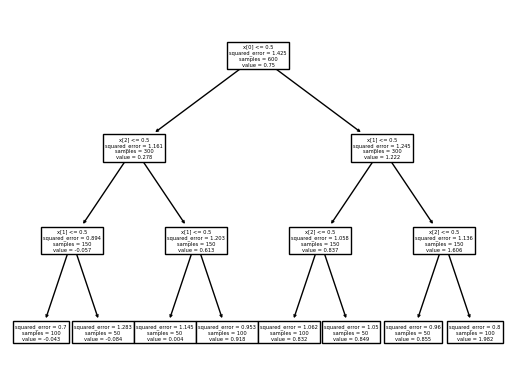

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(reg)
plt.show()
fig.savefig('test_fig.png')

In [49]:
from sklearn.inspection import permutation_importance
x_1 = [1,1,1,1,1,1,0,0,0,0,0,0]*50
x_2 = [1,1,1,0,0,0,1,1,1,0,0,0]*50
x_3 = [1,0,1,0,1,0,1,0,1,0,1,0]*50

df = pd.DataFrame(zip(x_1,x_2,x_3))
df.columns = ['x1','x2','x3']
df['y'] = df.apply(lambda seq: 1 * (seq.x1 +  seq.x2*seq.x3) + np.random.normal(), axis = 1)
X_test = df.loc[:,:'x3']
y_test = df.y

In [50]:
df.shape


(600, 4)

In [45]:
result = permutation_importance(
    reg, X_test, y_test, n_repeats=10,  n_jobs=8
)


In [46]:
result

{'importances_mean': array([0.31244363, 0.18193689, 0.20715518]),
 'importances_std': array([0.02826365, 0.01858842, 0.01839749]),
 'importances': array([[0.31872361, 0.35866042, 0.31875045, 0.36363939, 0.28830657,
         0.29769186, 0.28871549, 0.30307172, 0.27131758, 0.31555921],
        [0.18788187, 0.17918157, 0.16647566, 0.19437587, 0.2251736 ,
         0.17253804, 0.15324844, 0.18153384, 0.16886004, 0.19009995],
        [0.20409966, 0.20022235, 0.2032757 , 0.24863226, 0.20046486,
         0.23615224, 0.19266519, 0.19138396, 0.20254512, 0.19211041]])}

In [47]:
tree_importances = pd.Series(result.importances_mean, index=['x1','x2','x3'])

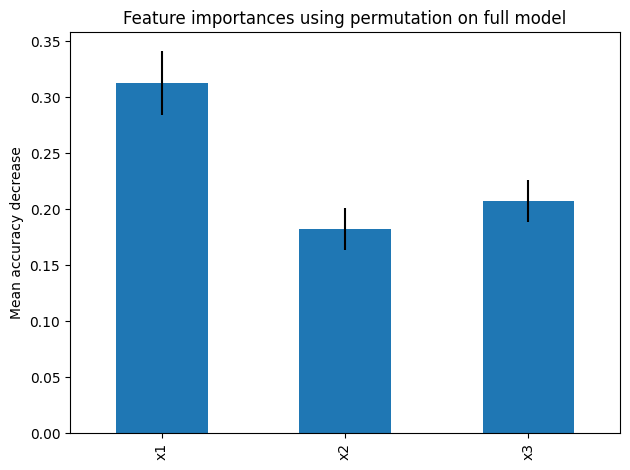

In [48]:
fig, ax = plt.subplots()
tree_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation importance score")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()